In [ ]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/')
from helpers_locs_to_home import time_2_date
from collections import Counter

from tqdm import tqdm_notebook as tqdmn
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as tkr
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
import re;pat = re.compile(r'''(-*\d+\.\d+ -*\d+\.\d+);*''');new_geo=[]
import warnings
import seaborn as sns
%matplotlib inline

### LR Tuning

### SVM Tuning

### AdaBoost Tuning

### Random Forest Tuning

In [39]:
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier

clf = RandomForestClassifier(n_estimators=1000, n_jobs=1)
param_distributions = {'criterion': ['gini', 'gini', 'entropy'],
                       'max_depth': range(2,50),
                       'min_samples_split': uniform(loc=0, scale=0.2),
                       'min_samples_leaf': uniform(loc=0, scale=0.2),
                       'bootstrap': [True, True, False]}


n_splits = 5
n_repeats = 5
n_iter = 500
n_jobs = -1
verbose = 1

cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
model = RandomizedSearchCV(clf, param_distributions, n_iter=n_iter, scoring=scorer, n_jobs=n_jobs, cv=cv, verbose=verbose)

model.fit(X_train, y_train)
print("Best model parameters: ", model.best_params_)
print("Best model roc auc score: ", model.best_score_)


Fitting 25 folds for each of 500 candidates, totalling 12500 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1122 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 2322 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed: 82.4min
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed: 101.3min
[Parallel(n_jobs=-1)]: Done 5922 tasks      | elapsed: 124.0min
[Parallel(n_jobs=-1)]: Done 7072 tasks      | elapsed: 148.8min
[Parallel(n_jobs=-1)]: Done 8322 tasks      | elapsed: 174.2min
[Parallel(n_jobs=-1)]: Done 9672 tasks      | elapsed: 199.3min
[Parallel(n_jobs=-1)]: Done 11122 tasks      | elapsed: 229.0min
[Parallel(n_jobs=-1)]: Done 12500 out of 12500 | elapsed: 254.8min finished


Best model parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 38, 'min_samples_leaf': 0.007877583208959238, 'min_samples_split': 0.0069437095447349995}
Best model roc auc score:  0.6802543698038217


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=38, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.007877583208959238,
            min_samples_split=0.0069437095447349995,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
clf_rf_best=RandomForestClassifier(bootstrap= True,
                                   criterion= 'gini',
                                   max_depth= 38,
                                   min_samples_leaf= 0.007877583208959238,
                                   min_samples_split=0.0069437095447349995)
clf_rf_best.fit(X_train, y_train);
print(classification_report(y_test,clf_rf_best.predict(X_test)))

             precision    recall  f1-score   support

          0       0.64      0.56      0.59       752
          1       0.60      0.68      0.64       738

avg / total       0.62      0.62      0.61      1490



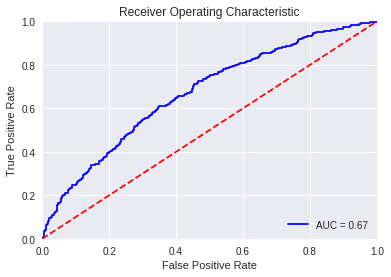

In [42]:
probs = clf_rf_best.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### XGBoost

In [2]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])



# SVM

## Location

### Reaal

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

    
for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = SVC()
    param_distributions = {'C': 10**np.random.uniform(low=-5,high=1),
                           'gamma': 10**np.random.uniform(low=-5,high=1),
                           'degree': range(1,4),
                           'kernel': ["linear", "poly", "rbf", "sigmoid"]}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

### Test

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=1

    
for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = SVC(kernel="rbf",probability=False)
    param_distributions = {'C': 10**np.random.uniform(low=-5,high=1),
                           'gamma': 10**np.random.uniform(low=-5,high=1)}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.probability=True
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

# AdaBoost

## Location Test

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

    
for i in tqdm(range(1,nb_rep_test+1)):
    stump_clf =  DecisionTreeClassifier(random_state=i, )
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = AdaBoostClassifier(base_estimator = stump_clf)
    param_distributions = {
              "n_estimators": list(range(1,500)),
              "learning_rate": uniform(0.01, 1),
    }
    #
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = 90
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## LinkedIn Test

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

    
for i in tqdm(range(1,nb_rep_test+1)):
    stump_clf =  DecisionTreeClassifier(random_state=i, )
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = AdaBoostClassifier(base_estimator = stump_clf)
    param_distributions = {
              "n_estimators": list(range(1,500)),
              "learning_rate": uniform(0.01, 1),
    }
    #
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = 90
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Archi

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/archi_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=10

    
for i in tqdm(range(5,nb_rep_test+1)):
    stump_clf =  DecisionTreeClassifier(random_state=i, )
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = AdaBoostClassifier(base_estimator = stump_clf)
    param_distributions = {
              "n_estimators": list(range(1,500)),
              "learning_rate": uniform(0.01, 1),
    }
    #
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

# RForest

## Location

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report


d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = RandomForestClassifier(n_estimators=1000, n_jobs=1)
    param_distributions = {'criterion': ['gini', 'gini', 'entropy'],
                           'max_depth': range(2,50),
                           'min_samples_split': uniform(loc=0, scale=0.2),
                           'min_samples_leaf': uniform(loc=0, scale=0.2),
                           'bootstrap': [True, True, False]}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## LinkedIn

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report


d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = RandomForestClassifier(n_estimators=1000, n_jobs=1)
    param_distributions = {'criterion': ['gini', 'gini', 'entropy'],
                           'max_depth': range(2,50),
                           'min_samples_split': uniform(loc=0, scale=0.2),
                           'min_samples_leaf': uniform(loc=0, scale=0.2),
                           'bootstrap': [True, True, False]}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = 90
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Archi

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm as tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/archi_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=10

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = RandomForestClassifier(n_estimators=1000, n_jobs=1)
    param_distributions = {'criterion': ['gini', 'gini', 'entropy'],
                           'max_depth': range(2,50),
                           'min_samples_split': uniform(loc=0, scale=0.2),
                           'min_samples_leaf': uniform(loc=0, scale=0.2),
                           'bootstrap': [True, True, False]}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

# XGBoost

## Location

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report


d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic', nthread=1,scale_pos_weight=1, base_score=0.5)
    #
    param_distributions = {"max_depth": range(3,50),
                           "learning_rate": uniform(loc=0, scale=0.1),
                           "n_estimators": range(10, 1500),
                           "min_child_weight": range(1, 200),
                           "gamma": uniform(loc=0, scale=0.1),
                           "subsample": uniform(loc=0.7, scale=0.3),
                           "colsample_bytree": uniform(loc=0.5, scale=0.5),
                           "colsample_bylevel": uniform(loc=0.1, scale=0.9), 
                           "reg_alpha": uniform(loc=0, scale=0.2),
                           "reg_lambda": uniform(loc=0.8, scale=0.2)}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

In [5]:
clf_xgb_best = XGBClassifier(silent=True,
                             objective='binary:logistic', nthread=1,
                             colsample_bylevel=0.7644347319502035,
                             colsample_bytree=0.5407410007880673,
                             gamma=0.06575869277016731,
                             learning_rate=0.007273150630348446,
                             max_depth=8,
                             min_child_weight=28,
                             n_estimators=1272,
                             reg_alpha=0.1689331019058065,
                             reg_lambda=0.8009806043156956,
                             subsample=0.7642669507003719,
                             scale_pos_weight=1, base_score=0.5,
                            n_jobs=10)

clf_xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.7644347319502035,
       colsample_bytree=0.5407410007880673, gamma=0.06575869277016731,
       learning_rate=0.007273150630348446, max_delta_step=0, max_depth=8,
       min_child_weight=28, missing=None, n_estimators=1272, n_jobs=10,
       nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0.1689331019058065, reg_lambda=0.8009806043156956,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7642669507003719)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_xgb_best.predict(X_test)))

             precision    recall  f1-score   support

          0       0.66      0.61      0.64       752
          1       0.63      0.68      0.66       738

avg / total       0.65      0.65      0.65      1490



/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## LinkedIn

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdmn(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic', nthread=1,scale_pos_weight=1, base_score=0.5)
    #
    param_distributions = {"max_depth": range(3,50),
                       "learning_rate": uniform(loc=0, scale=0.1),
                       "n_estimators": range(10, 1500),
                       "min_child_weight": range(1, 200),
                       "gamma": uniform(loc=0, scale=0.1),
                       "subsample": uniform(loc=0.7, scale=0.3),
                       "colsample_bytree": uniform(loc=0.5, scale=0.5),
                       "colsample_bylevel": uniform(loc=0.1, scale=0.9),
                       "reg_alpha": uniform(loc=0, scale=0.2),
                       "reg_lambda": uniform(loc=0.8, scale=0.2)}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Archi

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm as tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/archi_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=10

for i in tqdm(range(8,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic', nthread=1,scale_pos_weight=1, base_score=0.5)
    #
    param_distributions = {"max_depth": range(3,50),
                       "learning_rate": uniform(loc=0, scale=0.1),
                       "n_estimators": range(10, 1500),
                       "min_child_weight": range(1, 200),
                       "gamma": uniform(loc=0, scale=0.1),
                       "subsample": uniform(loc=0.7, scale=0.3),
                       "colsample_bytree": uniform(loc=0.5, scale=0.5),
                       "colsample_bylevel": uniform(loc=0.1, scale=0.9),
                       "reg_alpha": uniform(loc=0, scale=0.2),
                       "reg_lambda": uniform(loc=0.8, scale=0.2)}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = 25
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Get Average Performances

In [28]:
def report2dict(cr):
    # Parse rows
    tmp = list()
    for row in cr.split("\n"):
        parsed_row = [x for x in row.split("  ") if len(x) > 0]
        if len(parsed_row) > 0:
            tmp.append(parsed_row)
    
    # Store in dictionary
    measures = tmp[0]

    D_class_data = defaultdict(dict)
    for row in tmp[1:]:
        class_label = row[0]
        for j, m in enumerate(measures):
            D_class_data[class_label][m.strip()] = float(row[j + 1].strip())
    return D_class_data

In [51]:
class_rep_location=[]
import pickle
d_test_res=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/dic_res_location_xgb.p","rb"))
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

nb_rep=len(d_test_res["auc"])
X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

for i in tqdmn(range(1,nb_rep+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic',
                        nthread=1,scale_pos_weight=1, base_score=0.5)
    clf_xgb.set_params(**d_test_res["best_params"][i-1])
    clf_xgb.fit(X_train,y_train)
    class_rep_location.append(report2dict(classification_report(y_test,clf_xgb.predict(X_test))))
    

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [67]:
for i in ["0","1"]:
    for k in ["precision","recall","f1-score"]:
        print("%s\t%s\t%3f"%(i,k,np.mean([inst[i][k] for inst in class_rep_location])))

0	precision	0.652000
0	recall	0.596000
0	f1-score	0.624000
1	precision	0.628000
1	recall	0.682000
1	f1-score	0.652000


In [75]:
class_rep_location[2]

defaultdict(dict,
            {'0': {'precision': 0.63,
              'recall': 0.61,
              'f1-score': 0.62,
              'support': 731.0},
             '1': {'precision': 0.63,
              'recall': 0.65,
              'f1-score': 0.64,
              'support': 759.0},
             'avg / total': {'precision': 0.63,
              'recall': 0.63,
              'f1-score': 0.63,
              'support': 1490.0}})

In [52]:
import pickle
class_rep_linkedin=[]
d_test_res=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/dic_res_linkedin_xgb.p","rb"))
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

nb_rep=len(d_test_res["auc"])
X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

for i in tqdmn(range(1,nb_rep+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic',
                        nthread=1,scale_pos_weight=1, base_score=0.5)
    clf_xgb.set_params(**d_test_res["best_params"][i-1])
    clf_xgb.fit(X_train,y_train)
    class_rep_linkedin.append(report2dict(classification_report(y_test,clf_xgb.predict(X_test))))

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
for i in ["0","1"]:
    for k in ["precision","recall","f1-score"]:
        print("%s\t%s\t%3f"%(i,k,np.mean([inst[i][k] for inst in class_rep_linkedin])))

0	precision	0.700000
0	recall	0.732500
0	f1-score	0.717500
1	precision	0.735000
1	recall	0.702500
1	f1-score	0.720000


In [53]:
import pickle
class_rep_archi=[]
d_test_res=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/dic_res_archi_xgb.p","rb"))
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/archi_xgb_data.p","rb"))

nb_rep=len(d_test_res["auc"])
X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

for i in tqdmn(range(1,nb_rep+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic',
                        nthread=1,scale_pos_weight=1, base_score=0.5)
    clf_xgb.set_params(**d_test_res["best_params"][i-1])
    clf_xgb.fit(X_train,y_train)
    class_rep_archi.append(report2dict(classification_report(y_test,clf_xgb.predict(X_test))))
    

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [87]:
for i in ["0","1"]:
    for k in ["precision","recall","f1-score"]:
        print("%s\t%s\t%3f"%(i,k,np.mean([inst[i][k] for it,inst in enumerate(class_rep_archi) if not(it in[0,1,3,5])])))

0	precision	0.621667
0	recall	0.598333
0	f1-score	0.606667
1	precision	0.550000
1	recall	0.573333
1	f1-score	0.556667


In [83]:
class_rep_archi[9]

defaultdict(dict,
            {'0': {'precision': 0.64,
              'recall': 0.65,
              'f1-score': 0.65,
              'support': 49.0},
             '1': {'precision': 0.56,
              'recall': 0.55,
              'f1-score': 0.56,
              'support': 40.0},
             'avg / total': {'precision': 0.61,
              'recall': 0.61,
              'f1-score': 0.61,
              'support': 89.0}})